In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_11803/3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Questions:

1) Does Pclass have anything to do with chances of survival?
2) How would fill the missing Values in Age?
3) Does Sex play any role in Chances of survival?
4) What are SibSp and Parch?
5) Which Pclass pays the most Fare?
6) does Embarked location impacts chances of survival?
7) Which Sex payed the more Fare?

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<bold>We can see there are missing values in Age , Cabin and Embarked column.</bold>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
numeric = df.select_dtypes(['int64' , 'float64'])
category = df.select_dtypes('object')

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
for col in df.columns:
    print(df[col].value_counts())

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00

In [10]:
df['Name'].nunique()

891

In [11]:
df['Name'].shape

(891,)

In [12]:
df['Cabin'].nunique()

147

For cabin we can see that only 206 columns are not null. it is also an object type where we cannot use any mean or median and using mode here doesnt make any senses. so i dropped the cabin columns from my dataset.

I removed this column thinking it has a lot of missing values which was a wrong thing to do. I edited the notebook again again analysis for Cabin always. 

In [13]:
df['Cabin'].unique()



array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

The first string looks like the Different groups of Cabin like 'A','B','C'

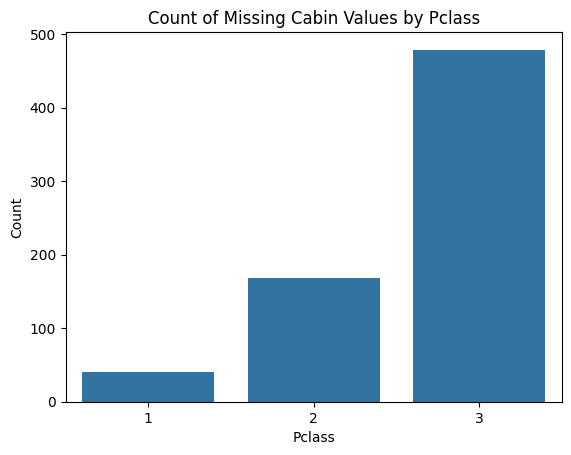

In [39]:
missing_cabin_by_pclass = df[df['Cabin'].isnull()].groupby('Pclass').size()
sns.barplot(x=missing_cabin_by_pclass.index, y=missing_cabin_by_pclass.values)
plt.title('Count of Missing Cabin Values by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

We can see that Pclass 3 has the most  number of values missing in Cabin column. Lets check if Pclass 3 has paid fare or has ticket or not. To check if they illegly climed in the titanic.

In [49]:
df[df['Ticket'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,level,Deck


We can see there is no null values in Ticket column so our assumption was wrong

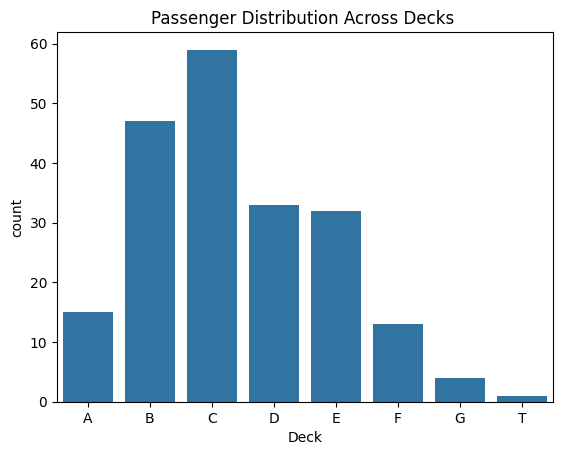

In [26]:
df['Deck'] = df['Cabin'].str[:1]


df_filtered = df.dropna(subset=['Deck'])


sns.countplot(x='Deck', data=df_filtered, order=sorted(df_filtered['Deck'].unique()))
plt.title('Passenger Distribution Across Decks ')
plt.show()

We can see In Deck C there are most number of people. followed by B 

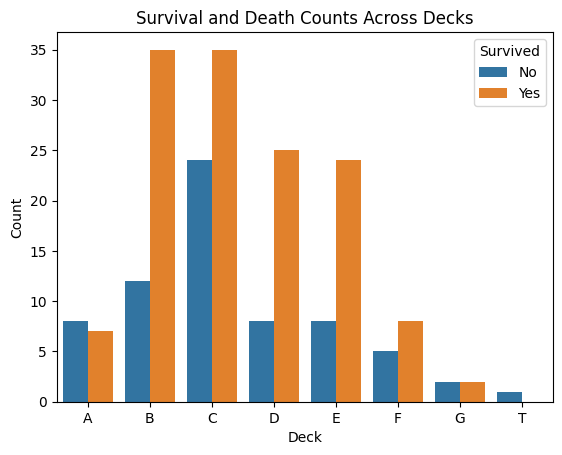

In [29]:
df['Deck'] = df['Cabin'].str[:1]
df_filtered = df.dropna(subset=['Deck'])
sns.countplot(x='Deck', hue='Survived', data=df_filtered, order=sorted(df_filtered['Deck'].unique()))
plt.title('Survival and Death Counts Across Decks')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

We can see that From Deck B and C most number of people survived  and no one survived from Deck T. 

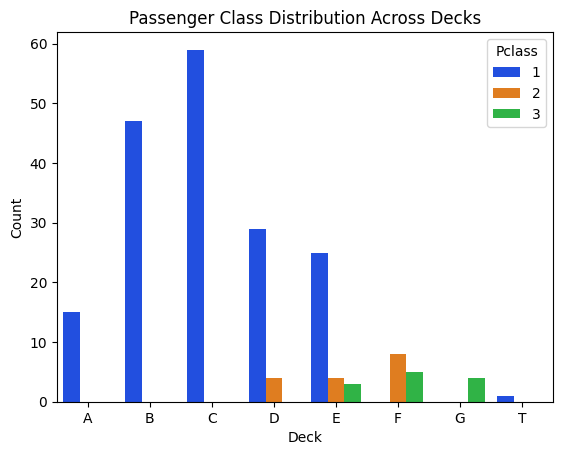

In [31]:
df['Deck'] = df['Cabin'].str[:1]

df_filtered = df.dropna(subset=['Deck'])
sns.countplot(x='Deck', hue='Pclass', data=df_filtered, order=sorted(df_filtered['Deck'].unique()), palette = 'bright')
plt.title('Passenger Class Distribution Across Decks')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

There are a lot of missing values in Cabin but based on available info  we can see that in Deck B and C Pclass 1 were the most and they also survived the most.

In [ ]:


survived_df = df[df['Survived'] == 1]
died_df = df[df['Survived'] == 0]


cabin_survivors = survived_df.groupby('Cabin')['Survived'].sum()
cabin_deaths = died_df.groupby('Cabin')['Survived'].count()


cabin_with_most_survivors = cabin_survivors.idxmax()
most_survivors_count = cabin_survivors.max()


cabin_with_most_deaths = cabin_deaths.idxmax()
most_deaths_count = cabin_deaths.max()

print(f"The cabin with the highest number of survivors is {cabin_with_most_survivors} with {most_survivors_count} survivors.")
print(f"The cabin with the highest number of deaths is {cabin_with_most_deaths} with {most_deaths_count} deaths.")



The cabin with the highest number of survivors is B96 B98 with 4 survivors.
The cabin with the highest number of deaths is C124 with 2 deaths.


In [ ]:



cabin_subset = df[df['Cabin'] == 'B96 B98']


unique_pclass = cabin_subset['Pclass'].unique()

print(f"People in cabin B96 B98 belong to Pclass: {unique_pclass}")


People in cabin 'B96 B98' belong to Pclass: [1]


In [ ]:

cabin_subset = df[df['Cabin'] == "C124"]


unique_pclass = cabin_subset['Pclass'].unique()

print(f"People in cabin C124 belong to Pclass: {unique_pclass}")

People in cabin C124 belong to Pclass: [1]


Now we only have missing values in age column. Age column is very important as it plays important role in prediction so we must fill the age columns. 

<Axes: >

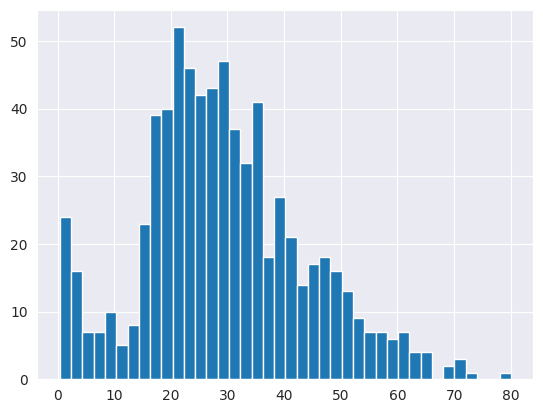

In [ ]:
df['Age'].hist(bins = 40)

In [ ]:
df['Name'].head()
a = df['Name']
b = a.str.split(',' , expand=True)[1]
df['Splitted_Name'] = b.str.split('.' , expand = True)[0]
df['Splitted_Name'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Splitted_Name, dtype: object

In [ ]:
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Lady' , 'Mrs')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Capt' , 'Mr')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Col' , 'Mr')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Don' , 'Mr')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Jonkheer' , 'Mr')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Major' , 'Mr')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Mlle' , 'Miss')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Mme' , 'Miss')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Ms' , 'Miss')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Dr' , 'Mr')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('Sir' , 'Mr')
df['Splitted_Name'] = df['Splitted_Name'].str.replace('the Countess' , 'Mrs')

In [ ]:
df[df['Splitted_Name'].str.contains('Sir')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splitted_Name


I have taken the mean to fill the missing value of Age with that mean value.

In [ ]:
df.groupby('Splitted_Name')['Age'].mean()

Splitted_Name
Master     4.574167
Miss      21.860000
Mr        32.875000
Mrs       35.981818
Rev       43.166667
Name: Age, dtype: float64

In [ ]:
df['Splitted_Name'].value_counts()

Splitted_Name
Mr        532
Miss      186
Mrs       127
Master     40
Rev         6
Name: count, dtype: int64

In [ ]:
df['Splitted_Name']= df['Splitted_Name'].str.strip()

#I was changing values and checking for the change in distrution and mistakely left the last value i used. I have edited the ages

In [ ]:
fill_values = { "Miss" : 21.860000 , "Mr" : 32.875000, "Master": 4.573750, "Mrs": 35.981818}

for name , value in fill_values.items():
    df.loc[df['Splitted_Name'] == name, 'Age' ] = df.loc[df['Splitted_Name'] == name, 'Age'].fillna(value)


In [ ]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Splitted_Name      0
dtype: int64

In [ ]:
missing_age_by_pclass = df.groupby('Pclass')['Age'].apply(lambda x: x.isnull().sum())

print("Number of missing values in 'Age' column by 'Pclass':")
print(missing_age_by_pclass)

Number of missing values in 'Age' column by 'Pclass':
Pclass
1    0
2    0
3    0
Name: Age, dtype: int64


In [ ]:
mean_age_of_Pclass = df.groupby('Pclass')['Age'].mean()
print(mean_age_of_Pclass)

Pclass
1    37.553285
2    29.937092
3    26.369005
Name: Age, dtype: float64


In [ ]:
median_age_of_Pclass = df.groupby('Pclass')['Age'].median()
print(median_age_of_Pclass)

Pclass
1    35.981818
2    30.000000
3    27.000000
Name: Age, dtype: float64


In [ ]:
missing_age_by_sex= df.groupby('Sex')['Age'].apply(lambda x: x.isnull().sum())

print("Number of missing values in 'Age' column by 'Sex':")
print(missing_age_by_sex)

Number of missing values in 'Age' column by 'Sex':
Sex
female    0
male      0
Name: Age, dtype: int64


In [ ]:
mean_age_of_sex = df.groupby('Sex')['Age'].mean()
print(mean_age_of_sex)

Sex
female    27.658124
male      30.992140
Name: Age, dtype: float64


In [ ]:
# def age_sex(cols):
#     Age = cols[0]
#     Sex = cols[1]

#     if pd.isnull(Age):
#         if Sex == 'female':
#             return 28
        
#         else:
#             return 30
        
#     else:
#         return Age

In [ ]:
# df['Age'] = df[['Age' , 'Sex']].apply(age_sex , axis = 1)

In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Splitted_Name      0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

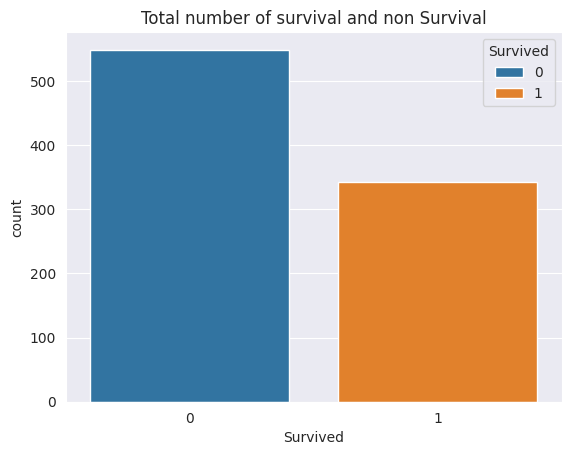

In [ ]:
sns.countplot(x='Survived' , hue = 'Survived' , data = df )
plt.title("Total number of survival and non Survival")
sns.set_style('darkgrid')

<bold> We can See that total number of people Survived is comparatively less than People that died </bold>

Text(0.5, 1.0, 'Relation between Sex and Survival chances')

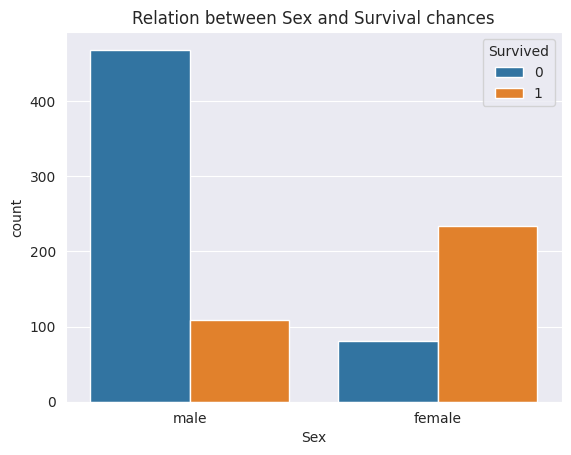

In [ ]:
sns.countplot(x='Sex', hue='Survived' , data = df )
sns.set_style('darkgrid')
plt.title("Relation between Sex and Survival chances")

We can see that Male has died more and female has survived more

Text(0.5, 1.0, 'Parch and their survival rate')

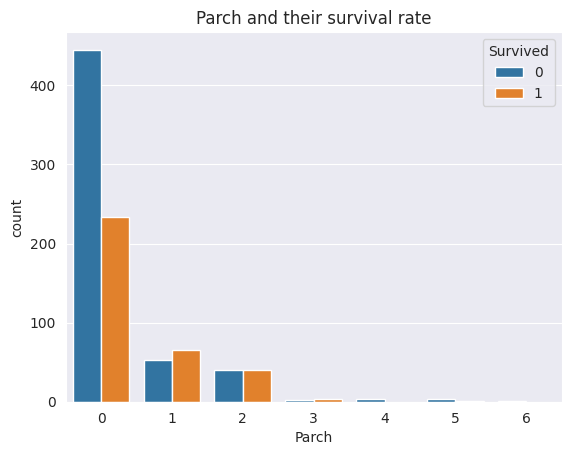

In [ ]:
sns.countplot(x='Parch' , hue ='Survived' , data = df)
plt.title("Parch and their survival rate")

In [ ]:
df['Parch'].value_counts()



Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

We can also see that child that travelled with granny only died more than that of child with family. But also survived more this may be because of the large number of them being on 0 label only. But if a child is with a parent then they have a high chances of surviving.

Text(0.5, 1.0, 'SibSp tag and their survival rate')

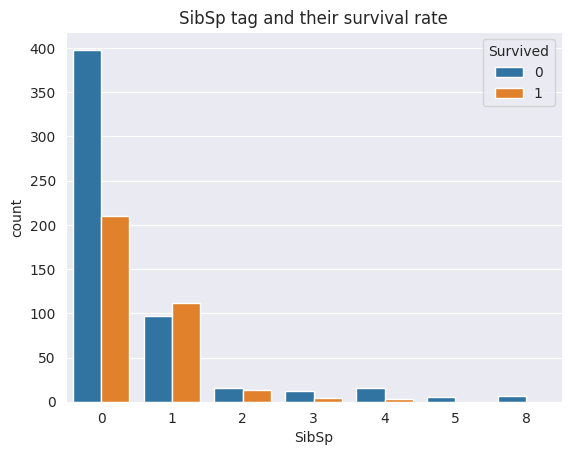

In [ ]:
sns.countplot(x='SibSp' , hue ='Survived' , data = df)
plt.title("SibSp tag and their survival rate")

<bold>It is seen that any person that came alone without any other family member died more than that of people who were with family. But the person who came alone also survived. more than other. This is also because of the distribution . And same as above if travelling with a sibling or anyone other can increase a chance of your survival </bold>

In [ ]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [ ]:
df_hello = df[df['Fare'] == 0]
df_hello

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splitted_Name
179,180,0,3,"Leonard, Mr. Lionel",male,36.000,0,0,LINE,0.0,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.000,0,0,112059,0.0,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000,0,0,LINE,0.0,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,32.875,0,0,239853,0.0,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000,0,0,LINE,0.0,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,32.875,0,0,239853,0.0,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,32.875,0,0,239853,0.0,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,32.875,0,0,239854,0.0,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.000,0,0,LINE,0.0,NaN,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,32.875,0,0,112052,0.0,NaN,S,Mr


In [ ]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<bold> It can be seen that Pclass with 1 catagory paid more price for ticket than the other two class.</bold>

Text(0.5, 1.0, 'Pclass and their Embarked location')

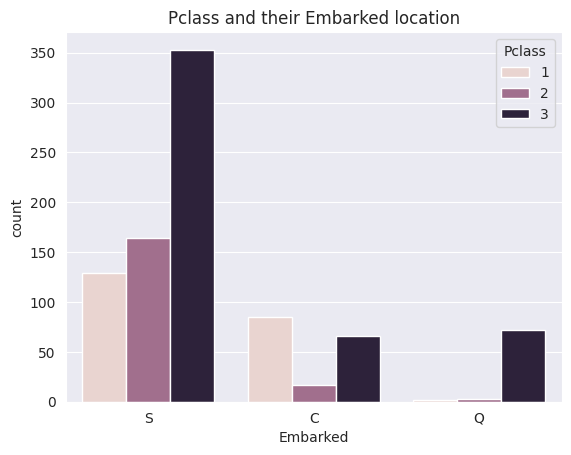

In [ ]:
sns.countplot(data=df, x='Embarked', hue='Pclass')
plt.title("Pclass and their Embarked location")

<bold> We can see that from Southhampton people from class 3 joined the most. From Cherbourg people from class 1 joined the most. </bold>

Text(0.5, 1.0, 'Embarked location and its impact on chances of Survival')

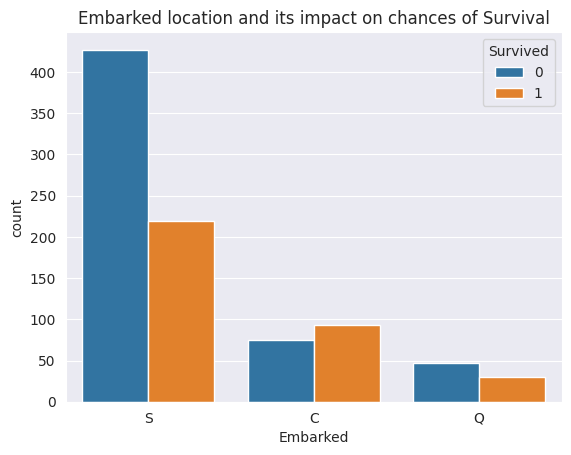

In [ ]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Embarked location and its impact on chances of Survival")

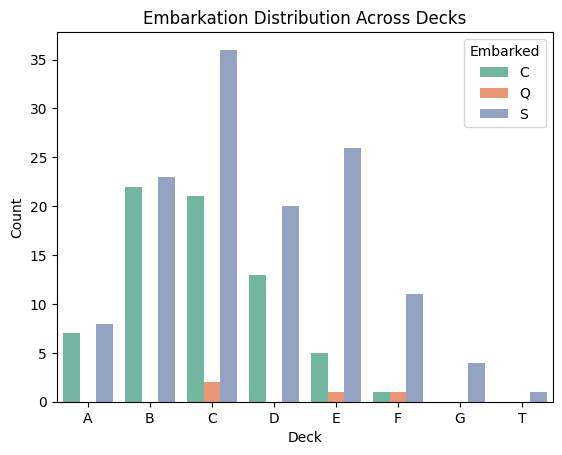

In [35]:
df['Deck'] = df['Cabin'].str[:1]
df_filtered = df.dropna(subset=['Deck'])
sns.countplot(x='Deck', hue='Embarked', data=df_filtered, order=sorted(df_filtered['Deck'].unique()), palette='Set2', hue_order=['C', 'Q', 'S'])
plt.title('Embarkation Distribution Across Decks')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Embarked')
plt.show()


We can see From Deck B and C people embraked from Southhampton the most.

In [ ]:

cabin_subset = df[df['Cabin'] == 'B96 B98']

# Get unique Embarked values within the subset
unique_embarked = cabin_subset['Embarked'].unique()

print(f"People in cabin B96 B98 embarked from: {unique_embarked}")

People in cabin B96 B98 embarked from: ['S']


<Axes: xlabel='Pclass', ylabel='count'>

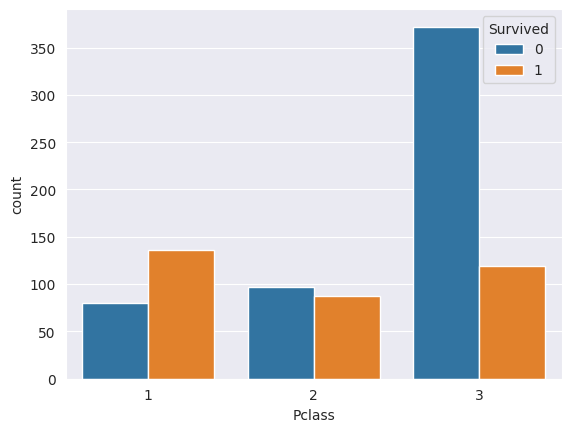

In [ ]:
sns.countplot(data = df , x = 'Pclass' , hue = 'Survived')

<bold>As seen above from Southhampton people from class 3 were most joined and hence the survival of people of southhampton is less then that of people who died. But in the case of Cherbourg we know that people from class 1 were joined the most and hence the chanced of survival is more than that of death</bold>

Text(0.5, 1.0, 'Pclass and their chances of Survival')

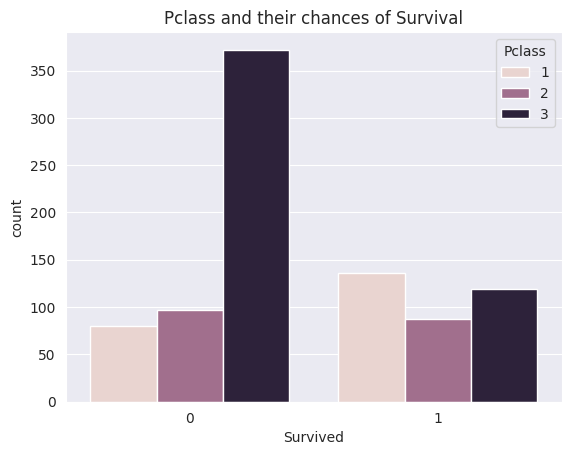

In [ ]:
sns.countplot(x = 'Survived' , hue = 'Pclass' , data = df)
plt.title("Pclass and their chances of Survival")

From this plot we can see that Pclass 3 has died the most and  pclass 1 has survived the most among three class. This can also be because the total number of pessenger were among the 3rd category of people.


In [ ]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Splitted_Name      0
dtype: int64

In [ ]:
corr = numeric.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


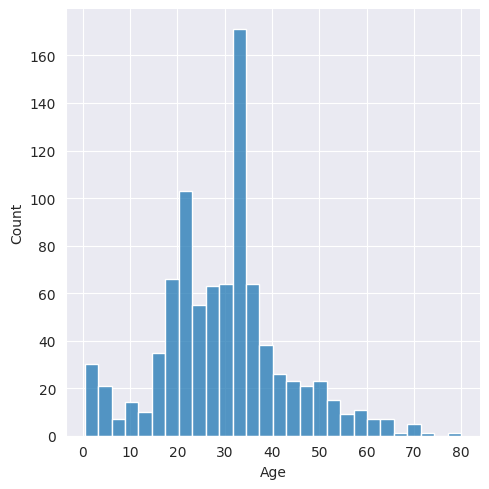

In [ ]:
sns.displot(df['Age'] , kde= False)

<Axes: >

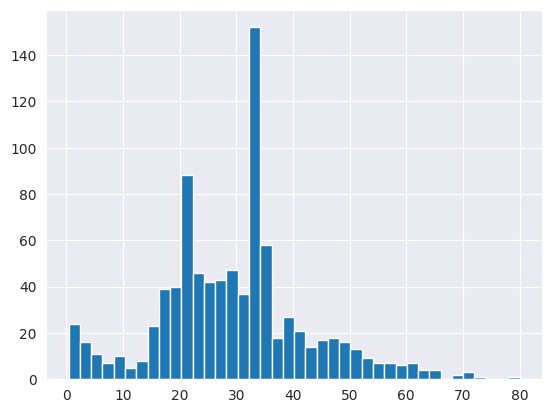

In [ ]:
df['Age'].hist(bins=40)

In [ ]:
df.duplicated().sum()

0

<bold> We can see that there are only Males who didnt pay any Fare and all those people were Embarked from Southhampton only. And Among them only one of them survived.<bold>

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

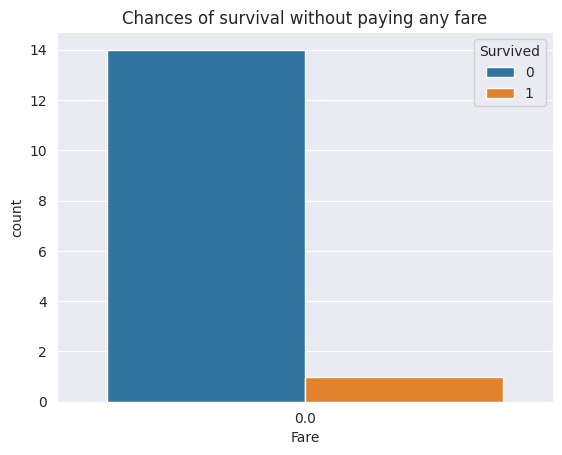

In [ ]:
sns.countplot(df_hello , x = 'Fare' , hue = 'Survived')
plt.title("Chances of survival without paying any fare")
plt.tight_layout

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splitted_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
df.groupby("Sex")['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Which Sex paid the most Fare')

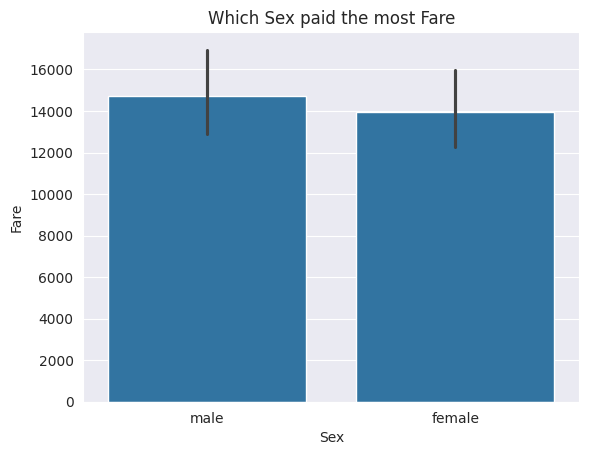

In [ ]:
sns.barplot(x='Sex', y='Fare', data=df , estimator = 'sum')
plt.title("Which Sex paid the most Fare")

<bold> From this barplot we can see that Male has paid more Fare than women. But if we calculate the mean Fare paid we can see that Women paid more than man. This can be beacuse of the distribution of male and female population.</bold>

Text(0.5, 1.0, 'Sex and their Fare paid distribution')

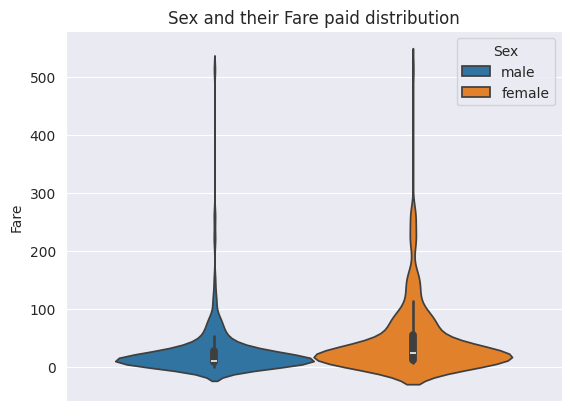

In [ ]:
sns.violinplot(y= 'Fare' , hue='Sex' , data = df)
plt.title("Sex and their Fare paid distribution")

<bold>From this violinplot as well we can see that in the range of 100 dollar there is even distribution between male and female. But in the range 100 to 200 women paid more money than male.</bold>

Text(0.5, 1.0, 'Pclass and their Fare paid distribution')

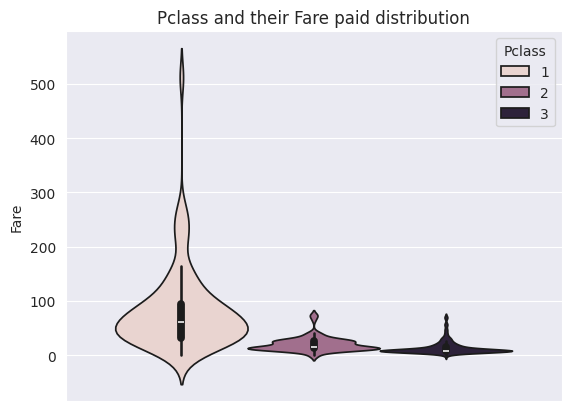

In [ ]:
sns.violinplot(y= 'Fare' , hue='Pclass' , data = df)
plt.title("Pclass and their Fare paid distribution")

Text(0.5, 1.0, 'SibSP and their Fare distribution')

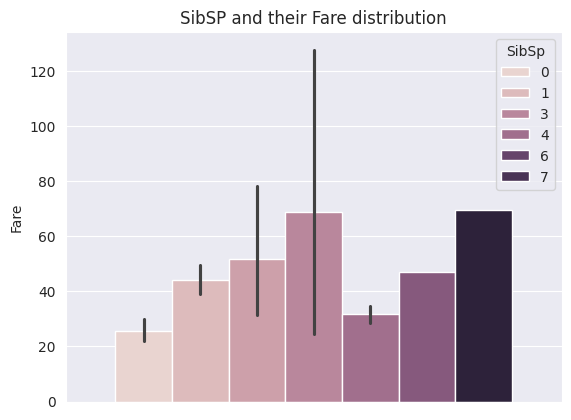

In [ ]:
sns.barplot(y= 'Fare' , hue='SibSp' , data = df ) 
plt.title("SibSP and their Fare distribution")

In [ ]:
df[df['SibSp'] == 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splitted_Name
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,Master
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Miss
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Miss
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,Master
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q,Master
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,Master
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,Miss
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,Master
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,Mr


In [ ]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Text(0.5, 1.0, 'Name Tag and their Chances of Survival')

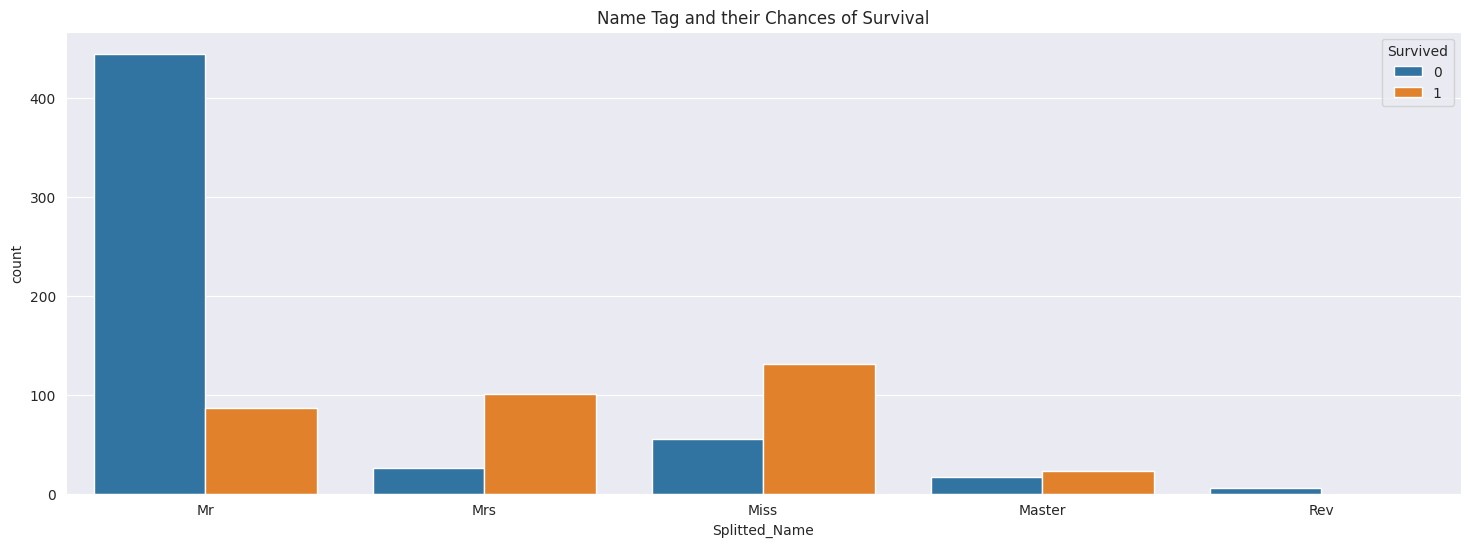

In [ ]:
plt.figure(figsize=(18, 6)) 
sns.countplot(x='Splitted_Name', hue='Survived', data=df)
plt.title("Name Tag and their Chances of Survival")

From this plot we can see that Mr tag has died the most and Miss and Mrs has survived the most. 

In [ ]:
df['Splitted_Name'].value_counts()

Splitted_Name
Mr        532
Miss      186
Mrs       127
Master     40
Rev         6
Name: count, dtype: int64

In [ ]:
df['Caste'] = df['Name'].str.split("," , expand = True)[0]

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splitted_Name,Caste
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


In [ ]:
df['Caste'].nunique()

667

In [ ]:
df.shape

(891, 14)

In [ ]:
caste_counts = df['Caste'].value_counts()

repeated_castes = caste_counts[caste_counts > 1]

print("Repeated Castes:")
print(repeated_castes)
caste_counts.describe()

Repeated Castes:
Caste
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hocking      2
Kantor       2
Petroff      2
Johnston     2
Dean         2
Name: count, Length: 133, dtype: int64


count    667.000000
mean       1.335832
std        0.854922
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: count, dtype: float64

In [ ]:

# deaths_by_caste = df[df['Survived'] == 0]['Caste'].value_counts()

# survivals_by_caste = df[df['Survived'] == 1]['Caste'].value_counts()


# print("Caste with the highest number of deaths:")
# print(deaths_by_caste, deaths_by_caste.max())


# print("Caste with the highest number of survivals:")
# print(survivals_by_caste, survivals_by_caste.max())


In [ ]:
# df[df['Caste']=='Sage']

#below code is to check which people with which surname died the most

In [ ]:
class_dead = df[df['Survived'] == 0].groupby(['Caste' , 'Pclass']).size()
class_dead_sorted = class_dead.sort_values(ascending= False)






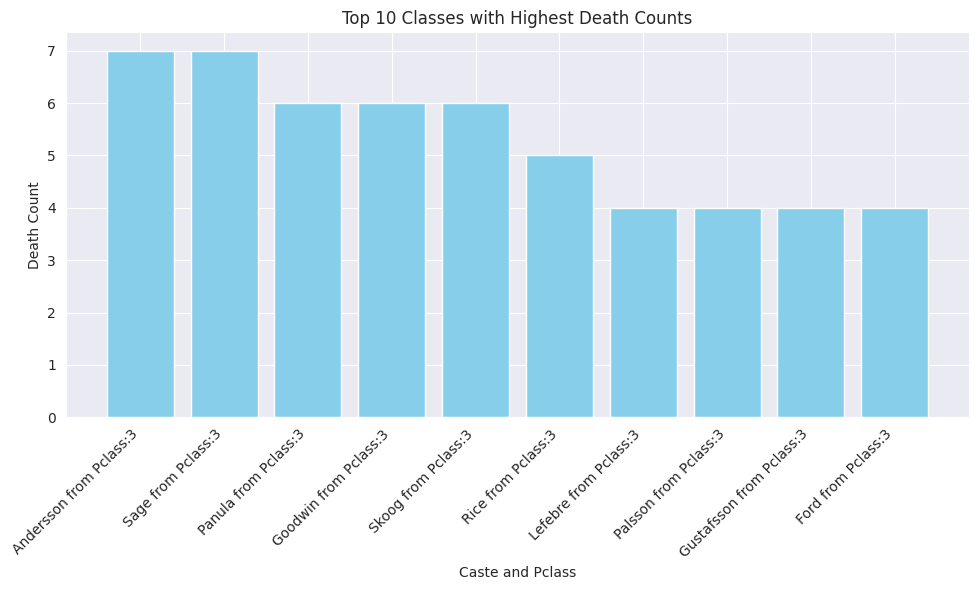

In [ ]:
top_10_classes_dead = class_dead_sorted.head(10)


caste_pclass = [f"{caste} from Pclass:{Pclass}" for caste, Pclass in top_10_classes_dead.index]
death_counts = top_10_classes_dead.values


plt.figure(figsize=(10, 6))
plt.bar(caste_pclass, death_counts, color='skyblue')
plt.xlabel('Caste and Pclass')
plt.ylabel('Death Count')
plt.title('Top 10 Classes with Highest Death Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that there are highest death count all from Pclass3

In [ ]:
class_survived= df[df['Survived'] == 1].groupby(['Caste' , 'Pclass']).size()
class_survived_sorted = class_survived.sort_values(ascending= False)




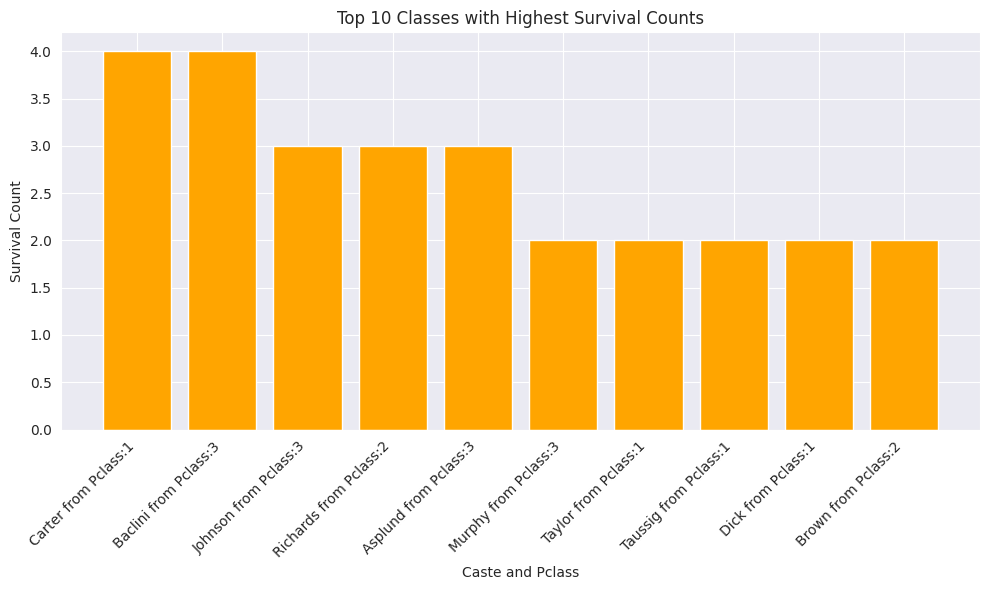

In [ ]:
top_10_classes_survived = class_survived_sorted.head(10)

caste_pclass_survived = [f"{caste} from Pclass:{Pclass}" for caste, Pclass in top_10_classes_survived.index]
survival_counts = top_10_classes_survived.values


plt.figure(figsize=(10, 6))
plt.bar(caste_pclass_survived, survival_counts, color='Orange')
plt.xlabel('Caste and Pclass')
plt.ylabel('Survival Count')
plt.title('Top 10 Classes with Highest Survival Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

If you are a Carter from Pclass of 1 then you have the highest chance of surviving.  Also Begin from Pclass1 gives advantage.

In [ ]:
df_num = numeric

In [ ]:
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


<Axes: >

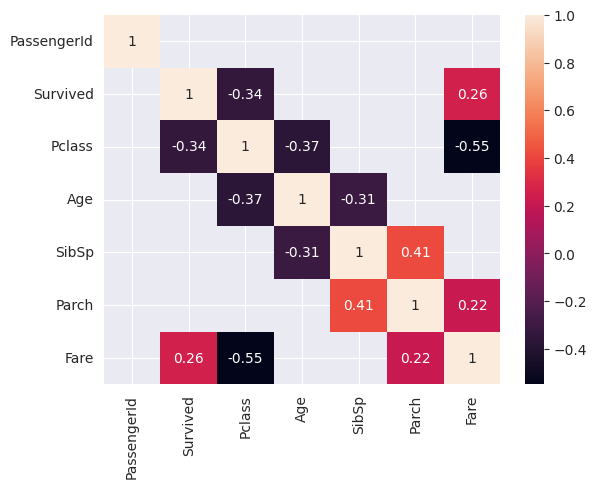

In [ ]:
corr = df_num.corr()


threshold = (corr < 0.2) & (corr > -0.2)
sns.heatmap(corr, annot=True, mask=threshold)

In [ ]:
df['Family_Size'] = df['SibSp'] + df['Parch']+1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Splitted_Name,Caste,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1


### Cleaning Part



1. There are total of 891 rows in the dataset before cleaning or dropping any missing values.
2. Cabin Column had more than 70% value missing so i dropped the Column 
3. Age column also had 177 values missing and that was replaced by the Mean of Name tag of each name i.e MR , Mrs , Miss. 
4. Embarked also had 2 value missing and it was replaced using mode.
5. All the missing value are now dealt with and there was no any duplicate values as well. 


### Findings

1) Cherbourg had the most expensive ticket price among all the three embarked location. Followed by SOuthhampton and at lastly Queensland.

2) Total number of people who survived was nearly half than the one who died.

3) Male Passenger died more than female. The ratio of male and female survivours was nearly double.

4) Child who travelled with only Granny died more than child travelled with other family members. But surprisingly Child who travelled with granny also survived more than other. This can be because of uneven distribution between each class.

5) Those who travelled alone  died more than that of people who travelled with family members. But they also survived more. Those who travelled with one of the family members survived more than the death count.

6) There were people who didnt pay any Fare to join the titanic. All of them were embarked from Southhampton and only one pessenger among them survived.

7) Pclass catagory 1 paid more Fare rate than the other two class. 

8) most of the Pclass catagory 3 embarked from Southhampton. From Cherbourg maximum of Pclass 1 embarked. We can infer that Cherbourg is the VIP area.

9) We can see that people who embarked from southhamption died the most. This can also infer that pclass of 3 catagory were the most from southhampton which can correlate to pclass 3 dying the most. On a different note people who embarked from cherbourg survived more than the people died. And from that location people of 1 Pclass were maximum.

10) Pclass of 1 survived more than death, the survival and death of pclass 2 was even but pclass 3 died incredebly more than survived.

11) Female paid more Fare than Man.

12) The tag of Mr died the most as exected but Mrs and Miss survived more than death. Master also survived more this can be because of small children are also prioratize.

13) Surname of Andersson  was repreated themost i.e for 9 times. 

14) Also Andersson surname died the most i.e total amount = 7. this can be because they belongs to Pclass 3.  Sage surname death amount was also 7 and they were from pclass 3 only.

15) Infact among the most of the repeated death of same surname was from pclass of 3 only.

16) Carter surname from Pclass 1 survived the most. But surprisingly Baclini from Pclass 3 also survived the most. 

17) From the heat map we can see that there is a decent negative correlation between Pclass and Fare. Also there is a decent positive correlation between SibSp and Parch. There is also negative correlation between Parch and Age.


In [ ]:
df.to_csv('Titanic_cleaned.csv')